# 1 关联图correlation

## 1.8 相关性矩阵图

### 1.8.1 相关性矩阵存在的必要性

横坐标/纵坐标：一个数据集中的所有变量（可能包含特征或标签）<br>
颜色：越接近红和绿，相关性越强，绿色代表正相关，红色代表负相关，浅黄色代表不相关

### 1.8.2 导入需要的绘图库和数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize':med,
    'figure.figsize':med,
    'figure.figsize':(16,10),
    'axes.labelsize':med,
    'axes.titlesize':med,
    'xtick.labelsize':med,
    'ytick.labelsize':med,
    'figure.titlesize':large
}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
%matplotlib inline

In [4]:
#导入数据
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')

In [5]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [6]:
#32种不同品牌的轿车的11个属性
name = ['英里/加仑', '气缸数量', '排量', '总马力', '驱动轴比', '重量', '1/4英里所用时间', '引擎', '变速器', '前进档数', '化油器数量', '用油是否高效', '汽车', '汽车名称']
df.columns = name
df.head()

,英里/加仑,气缸数量,排量,总马力,驱动轴比,重量,1/4英里所用时间,引擎,变速器,前进档数,化油器数量,用油是否高效,汽车,汽车名称
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [7]:
#其中cars和carname是一模一样的数据
(df['汽车'] != df['汽车名称']).sum()

0

### 1.8.3 先实现相关性矩阵，再实现热力图

> **df.corr()：实现相关性矩阵**
>> method：填写相关系数类型的参数，可以选择"pearson", "kendall", "spearman"

In [8]:
df.corr(method = 'pearson')

,英里/加仑,气缸数量,排量,总马力,驱动轴比,重量,1/4英里所用时间,引擎,变速器,前进档数,化油器数量,用油是否高效
英里/加仑,1.000000,-0.858539,-0.867536,-0.787309,0.680312,-0.883453,0.420317,0.669260,0.593153,0.487226,-0.553703,0.730748
气缸数量,-0.858539,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,-0.695182
排量,-0.867536,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,-0.732073
总马力,-0.787309,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,-0.751422
驱动轴比,0.680312,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,0.400430
重量,-0.883453,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606,-0.611265
1/4英里所用时间,0.420317,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249,0.488649
引擎,0.669260,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607,0.594588
变速器,0.593153,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534,0.283129
前进档数,0.487226,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073,0.266919


In [9]:
df.corr(method = 'spearman')

,英里/加仑,气缸数量,排量,总马力,驱动轴比,重量,1/4英里所用时间,引擎,变速器,前进档数,化油器数量,用油是否高效
英里/加仑,1.000000,-0.910801,-0.908882,-0.894665,0.651455,-0.886422,0.466936,0.706597,0.562006,0.542782,-0.657498,0.803735
气缸数量,-0.910801,1.000000,0.927652,0.901791,-0.678881,0.857728,-0.572351,-0.813789,-0.522071,-0.564310,0.580068,-0.706188
排量,-0.908882,0.927652,1.000000,0.851043,-0.683592,0.897706,-0.459782,-0.723664,-0.624068,-0.594470,0.539778,-0.697788
总马力,-0.894665,0.901791,0.851043,1.000000,-0.520125,0.774677,-0.666606,-0.751593,-0.362328,-0.331402,0.733379,-0.723960
驱动轴比,0.651455,-0.678881,-0.683592,-0.520125,1.000000,-0.750390,0.091869,0.447457,0.686571,0.744816,-0.125223,0.391159
重量,-0.886422,0.857728,0.897706,0.774677,-0.750390,1.000000,-0.225401,-0.587016,-0.737713,-0.676128,0.499812,-0.591733
1/4英里所用时间,0.466936,-0.572351,-0.459782,-0.666606,0.091869,-0.225401,1.000000,0.791571,-0.203332,-0.148200,-0.658718,0.467413
引擎,0.706597,-0.813789,-0.723664,-0.751593,0.447457,-0.587016,0.791571,1.000000,0.168345,0.282662,-0.633695,0.594588
变速器,0.562006,-0.522071,-0.624068,-0.362328,0.686571,-0.737713,-0.203332,0.168345,1.000000,0.807688,-0.064365,0.283129
前进档数,0.542782,-0.564310,-0.594470,-0.331402,0.744816,-0.676128,-0.148200,0.282662,0.807688,1.000000,0.114887,0.326405


In [10]:
df.corr(method = 'kendall')

,英里/加仑,气缸数量,排量,总马力,驱动轴比,重量,1/4英里所用时间,引擎,变速器,前进档数,化油器数量,用油是否高效
英里/加仑,1.000000,-0.795313,-0.768131,-0.742813,0.464549,-0.727832,0.315365,0.589679,0.469013,0.433151,-0.504395,0.670744
气缸数量,-0.795313,1.000000,0.814426,0.785186,-0.551318,0.728261,-0.448970,-0.771001,-0.494621,-0.512543,0.465430,-0.669057
排量,-0.768131,0.814426,1.000000,0.665999,-0.498983,0.743382,-0.300815,-0.603306,-0.520274,-0.475980,0.413736,-0.581733
总马力,-0.742813,0.785186,0.665999,1.000000,-0.382627,0.611308,-0.472906,-0.630593,-0.303996,-0.279446,0.595984,-0.607408
驱动轴比,0.464549,-0.551318,-0.498983,-0.382627,1.000000,-0.547150,0.032722,0.375101,0.575548,0.583925,-0.095352,0.327906
重量,-0.727832,0.728261,0.743382,0.611308,-0.547150,1.000000,-0.141988,-0.488479,-0.613879,-0.543596,0.371374,-0.492403
1/4英里所用时间,0.315365,-0.448970,-0.300815,-0.472906,0.032722,-0.141988,1.000000,0.657543,-0.168904,-0.091261,-0.506439,0.388271
引擎,0.589679,-0.771001,-0.603306,-0.630593,0.375101,-0.488479,0.657543,1.000000,0.168345,0.269748,-0.576927,0.594588
变速器,0.469013,-0.494621,-0.520274,-0.303996,0.575548,-0.613879,-0.168904,0.168345,1.000000,0.770788,-0.058599,0.283129
前进档数,0.433151,-0.512543,-0.475980,-0.279446,0.583925,-0.543596,-0.091261,0.269748,0.770788,1.000000,0.098015,0.311492


|分类型变量vs分类型变量|分类型变量vs连续型变量|连续型变量vs连续型变量|
|---|---|---|
|列联表分析<br>卡方检验(chi-squared)|二分类：点双列相关（皮尔逊相关系数的一种特殊情况）<br>多分类：Kruskal-Wallis H检验（如t检验或方差分析）|线性相关：皮尔逊相关系数<br>非线性相关：以Spearman相关系数为代表的一系列等级相关系数|

比较特别的是kendall相关系数，它对比的是两个变量按数量排序时（从小到大，或者从大到小），数据排序的相似性。其他相关系数可以在scipy和numpy库中找到。

In [12]:
coef = df.corr()

In [13]:
coef.columns = name[:12]

> **sns.heatmap：把相关性矩阵放到热力图里去**
>> data：输入的相关性矩阵
>> cmap：使用的光谱
>> center：绘制有色数据时将色彩映射居中的值，这是一个控制颜色的参数。如果没有指定cmap，使用此参数将更改默认的`cmap`参数。一般在center中填写数据的中值，比如皮尔逊相关系数的取值范围是[-1,1]，就在center中写0
>> annot：如果为True，则在热力图的每个单元格中写入数据值。如果是一个类似于`data`形状的数组，那么使用它来注释热图而不是原始数据

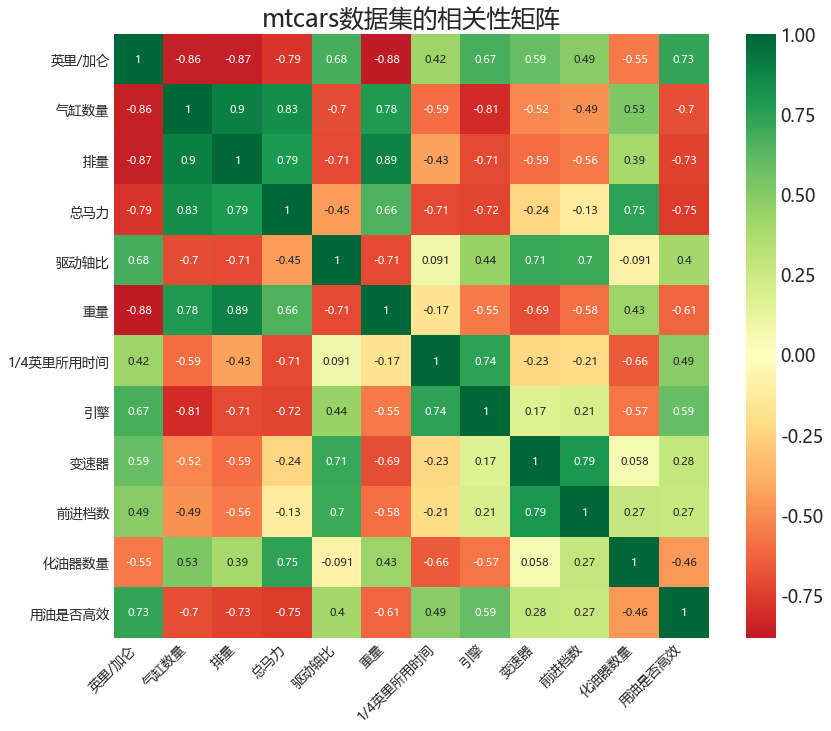

In [16]:
#确保正常显示中文和负号
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.rcParams['axes.unicode_minus'] = False

#绘制图像
plt.figure(figsize = (12,10), dpi = 80)
sns.heatmap(df.corr() #需要输入的相关性矩阵
           ,xticklabels = coef.columns #横坐标标签
           ,yticklabels = coef.columns #纵坐标标签
           ,cmap = 'RdYlGn' #使用的光谱，一般来说都会使用由浅至深，或者两头颜色差距较大的光谱
           ,center = 0 #填写数据的中值
           #,center = 1 #填写数据中的最大值/最小值，则最大值/最小值是最浅或最深的颜色，数据离该极值越远，颜色越浅/越深
           ,annot = True
           )

#装饰图像
plt.title('mtcars数据集的相关性矩阵', fontsize = 22)
plt.xticks(fontsize = 12
           ,rotation = 45 #默认90，逆时针旋转度数
           ,horizontalalignment = 'right' #刻度的相对位置：left、right、center
          )
plt.yticks(fontsize = 12)
plt.show()

In [17]:
import numpy as np

In [18]:
np.zeros((12,12))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

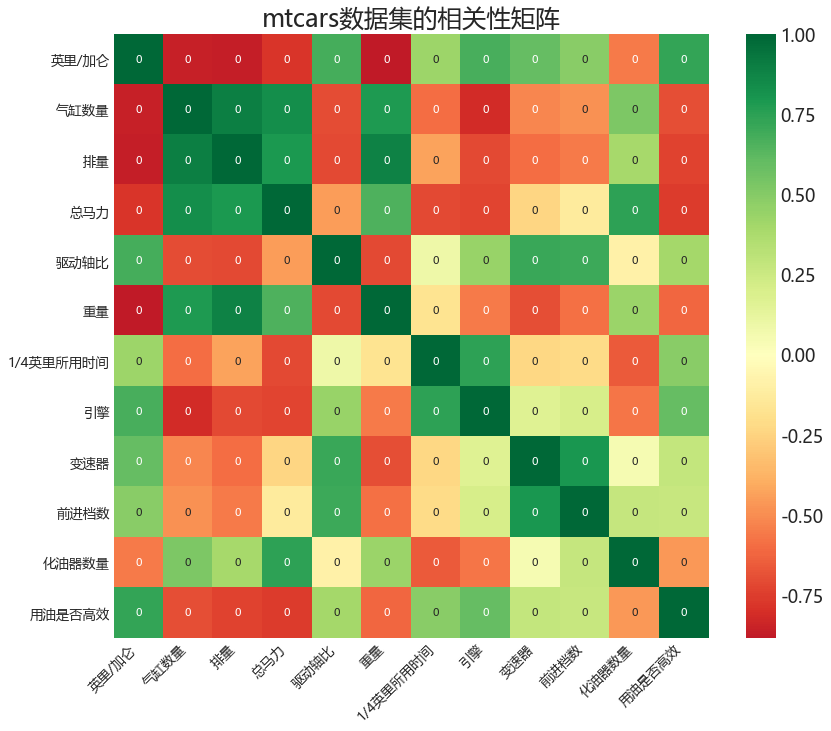

In [19]:
#确保正常显示中文和负号
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.rcParams['axes.unicode_minus'] = False

#绘制图像
plt.figure(figsize = (12,10), dpi = 80)
sns.heatmap(df.corr() #需要输入的相关性矩阵
           ,xticklabels = coef.columns #横坐标标签
           ,yticklabels = coef.columns #纵坐标标签
           ,cmap = 'RdYlGn' #使用的光谱，一般来说都会使用由浅至深，或者两头颜色差距较大的光谱
           ,center = 0 #填写数据的中值
           #,center = 1 #填写数据中的最大值/最小值，则最大值/最小值是最浅或最深的颜色，数据离该极值越远，颜色越浅/越深
           ,annot = np.zeros((12,12))
           )

#装饰图像
plt.title('mtcars数据集的相关性矩阵', fontsize = 22)
plt.xticks(fontsize = 12
           ,rotation = 45
           ,horizontalalignment = 'right')
plt.yticks(fontsize = 12)
plt.show()

### 1.8.4 解读图像